## LOGISTIC REGRESSION HOMEWORK

In [1]:
# Libraries Imports

import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

## Functions used for Homework

In [2]:
def mutual_above_average_score(feature):
    return mutual_info_score(feature, df_train.above_average).round(2)

def encode_OHE(df_train, df_val, df_test, sparse):
    '''
    OneHot Encoding Implementation
    
    Returns: X_train, X_val, X_test
    '''
    dv = DictVectorizer(sparse=sparse)

    df_train_cat_cols = list(df_train.select_dtypes("object").columns)
    df_train_num_cols = list(df_train.select_dtypes("number").columns)

    train_dict = df_train[df_train_cat_cols + df_train_num_cols].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    val_dict = df_val[df_train_cat_cols + df_train_num_cols].to_dict(orient='records')
    X_val = dv.transform(val_dict)
    
    test_dict = df_test[df_train_cat_cols + df_train_num_cols].to_dict(orient='records')
    X_test = dv.transform(test_dict)
    return X_train, X_val, X_test
    

def train_model_accy(X_train, y_train, X_val, y_val):
    '''
    Trains a model using LogisticRegression
    
    Us trained model to predict on Validation dataset
    
    An compute the accuracy for the Validation dataset
    
    Returns model Accuracy figure
    '''
    #Train model 
    model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    
    #Predict with Validation data
    y_pred = model.predict(X_val)
    
    # Computes Accuracy score of prediction on the validation data
    model_accy = (y_val == y_pred).mean()
    return model_accy

def prepare_data_split(df, test_size, random_state, target_feature):
    '''
    Fuunction Split a dataset(df) in the ratio 60%/20%/20% == Train/Validation/Test
    
    return the train, Validation and Test dataset with their corresponding targer variable
    
    Note: the function does not remove the target feature
    '''
    df_full_train, df_test = train_test_split(df, test_size= test_size, random_state=random_state)
    df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=random_state)
    
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train = df_train[target_feature].values
    y_val = df_val[target_feature].values
    y_test = df_test[target_feature].values
    
    print(f"Length of Train: {len(df_train)}, Length of Validation: {len(df_val)}, Length of Test: {len(df_test)}")
    return df_train, y_train, df_val, y_val, df_test, y_test

def wrangle(data_filename):
    '''
    Function loads dataset from filename
    
    Filters that loaded dataset in accordance with spelt out criteria in the homework
    
    Returns the final dataset
    '''
    #load data file
    df = pd.read_csv(data_filename)
    
    # Remove space and convert to lower case for columns names
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    
    #Select features that are objects 
    col_list = list(df.dtypes[df.dtypes == 'object'].index)
    
    # Remove space and convert to lower case for observation for object features
    for col in col_list:
        df[col] = df[col].str.lower().str.replace(' ', '_')
        
    # fill missing values with 0
    df.fillna(0, inplace = True)
    
    # Rename "MSRP" Feature to "price"
    df.rename(columns = {"msrp": "price"}, inplace = True)
    
    #Select the final feature for use in homework 
    df_final = df[['make', 'model', 'year', 'engine_hp', 'engine_cylinders', 'transmission_type', 'vehicle_style',
               'highway_mpg', 'city_mpg', 'price']]
    return df_final



In [3]:
# load data using the wrangle function

data_file_name = "week3-car-data.csv"
df_final_1 = wrangle(data_file_name)

# Make copy of data for future use
df_final = df_final_1.copy(deep=True)
df_final.head()


,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,46135
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,40650
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,36350
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,29450
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,34500


In [4]:
#Q1

df_final.transmission_type.value_counts()

automatic           8266
manual              2935
automated_manual     626
direct_drive          68
unknown               19
Name: transmission_type, dtype: int64

In [ ]:
#The most frequent observation in the "transmission_type" is "AUTOMATIC"

In [5]:
# Q1
#Compute correlation
corr = df_final.select_dtypes("number").drop(columns = "price").corr()
corr

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg
year,1.000000,0.338714,-0.040708,0.258240,0.198171
engine_hp,0.338714,1.000000,0.774851,-0.415707,-0.424918
engine_cylinders,-0.040708,0.774851,1.000000,-0.614541,-0.587306
highway_mpg,0.258240,-0.415707,-0.614541,1.000000,0.886829
city_mpg,0.198171,-0.424918,-0.587306,0.886829,1.000000


<Axes: >

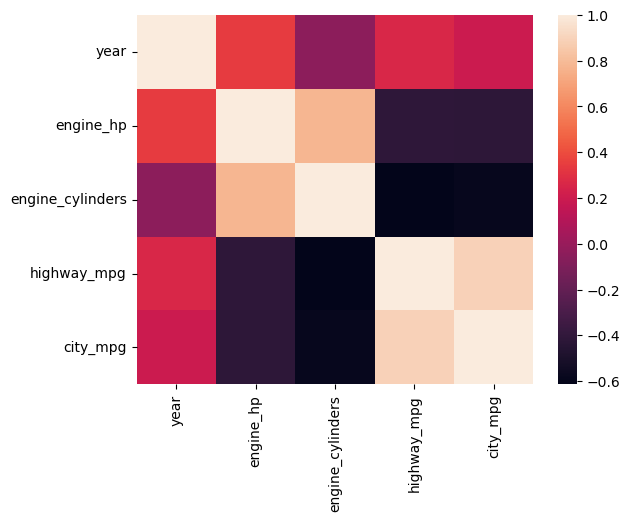

In [6]:
sns.heatmap(corr)

In [ ]:
# Q2 Two features that have the biggest correlation in this dataset: ANS = highway_mpg and city_mpg

In [7]:
df_final.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,46135
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,40650
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,36350
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,29450
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,34500


In [8]:
# Calculate Average Price
avg_price = df_final.price.mean()
print("Average Price: ", avg_price)

# create a variable "above_average" which is 1 if the price is above its mean value and 0 otherwise
df_final["above_average"] = (df_final.price > avg_price).astype(int)

# Delete Price feature
del df_final["price"]

display(df_final.head())

Average Price:  40594.737032063116


,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,1
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,1
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,0
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,0
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,0


In [9]:
# Setup Validation framework for logistic regression for dataset df_final

test_size = 0.2
random_state = 42
target = "above_average"
df_train, y_train, df_val, y_val, df_test, y_test = prepare_data_split(df_final, test_size, random_state, target)

print("Train")
display(df_train.head())
print()
print("Validation")
display(df_val.head())
print()
print("Test")
display(df_test.head())


Length of Train: 7148, Length of Validation: 2383, Length of Test: 2383
Train


,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,mitsubishi,endeavor,2011,225.0,6.0,automatic,4dr_suv,19,15,0
1,kia,borrego,2009,276.0,6.0,automatic,4dr_suv,21,17,0
2,lamborghini,gallardo,2012,570.0,10.0,manual,convertible,20,12,1
3,chevrolet,colorado,2016,200.0,4.0,automatic,crew_cab_pickup,27,20,0
4,pontiac,vibe,2009,158.0,4.0,automatic,4dr_hatchback,26,20,0



Validation


,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,volkswagen,beetle,2015,210.0,4.0,manual,2dr_hatchback,31,23,0
1,audi,sq5,2015,354.0,6.0,automatic,4dr_suv,24,17,1
2,pontiac,grand_am,2005,140.0,4.0,automatic,sedan,31,22,0
3,nissan,350z,2009,306.0,6.0,manual,convertible,24,17,0
4,ford,e-150,1996,199.0,6.0,automatic,passenger_van,15,11,0



Test


,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,gmc,envoy_xl,2005,275.0,6.0,automatic,4dr_suv,18,13,0
1,volkswagen,passat,2016,170.0,4.0,automatic,sedan,38,25,0
2,honda,odyssey,2016,248.0,6.0,automatic,passenger_minivan,28,19,0
3,chevrolet,cruze,2015,138.0,4.0,manual,sedan,36,25,0
4,volvo,740,1991,162.0,4.0,automatic,sedan,20,17,0


In [10]:
# Q3
# Calculate the mutual information score between above_average and other categorical variables in our training dataset

df_train_cat_cols = list(df_train.select_dtypes("object").columns)
print(df_train_cat_cols)

result = df_train[df_train_cat_cols].apply(mutual_above_average_score)
result.sort_values()

['make', 'model', 'transmission_type', 'vehicle_style']


transmission_type    0.02
vehicle_style        0.08
make                 0.24
model                0.46
dtype: float64

In [ ]:
#Q3 Which of these variables has the lowest mutual information score? ANS--- transmission_type

In [11]:
#Q4

# Delete Target Variable for train set
target = "above_average"
del df_train[target]
del df_val[target]
del df_test[target]

#One Hot Encode
sparse = False
X_train, X_val, X_test = encode_OHE(df_train, df_val, df_test, sparse)

In [12]:
# Training Logistic Regression

model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)

model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [13]:
y_pred = model.predict(X_val)

full_accy = (y_val == y_pred).mean()

print(full_accy.round(2))

0.94


In [89]:
# Q4 Calculate the accuracy on the validation dataset and round it to 2 decimal digits. ...ANS == 0.95

In [15]:
# Q5

model_diff = []
sparse = False
cat_cols = list(df_train.select_dtypes("object").columns)
num_cols = list(df_train.select_dtypes("number").columns)
for x in range(len(cat_cols)):
    cat_cols = list(df_train.select_dtypes("object").columns)
    
    drop_cat = cat_cols.pop(x)
    X_train, X_val, X_test = encode_OHE(df_train[cat_cols + num_cols],
                                         df_val[cat_cols + num_cols],
                                         df_test[cat_cols + num_cols],
                                         sparse
                                        )
    result = train_model_accy(X_train, y_train, X_val, y_val)
    model_diff.append([drop_cat, round(result - full_accy, 2)]) 
    
cat_cols = list(df_train.select_dtypes("object").columns)
num_cols = list(df_train.select_dtypes("number").columns)
for y in range(len(num_cols)):
    num_cols = list(df_train.select_dtypes("number").columns)
    
    drop_num = num_cols.pop(y)
    X_train, X_val, X_test = encode_OHE(df_train[cat_cols + num_cols],
                                         df_val[cat_cols + num_cols],
                                         df_test[cat_cols + num_cols],
                                         sparse
                                       )
    
    result = train_model_accy(X_train, y_train, X_val, y_val)
    model_diff.append([drop_num, round(result - full_accy, 2)])  
    
final_tab = pd.DataFrame(model_diff, columns = ["model_without", "difference"])
display(final_tab)

f_list  = list(final_tab.difference)
idx = f_list.index(min(f_list))

print(f"Least Difference Feature: {final_tab.model_without[idx]}, with difference: {min(f_list)}")

,model_without,difference
0,make,0.01
1,model,-0.02
2,transmission_type,0.00
3,vehicle_style,-0.01
4,year,0.00
5,engine_hp,-0.02
6,engine_cylinders,0.00
7,highway_mpg,-0.00
8,city_mpg,0.00


Least Difference Feature: model, with difference: -0.02


In [ ]:
# Q5 Which of following feature has the smallest difference? ANS -- engine_hp

In [16]:
# Q6

# Setup Validation framework
test_size = 0.2
random_state = 42
target = "price"

df_train, y_train, df_val, y_val, df_test, y_test = prepare_data_split(df_final_1, test_size, random_state, target)

y_train = np.log1p(y_train)
y_val = np.log1p(y_val)
y_test = np.log1p(y_test)
    
del df_train[target]
del df_val[target]
del df_test[target]


# Categorical encoding
#One Hot Encode
sparse = True
X_train, X_val, X_test = encode_OHE(df_train, df_val, df_test, sparse = sparse)

# Training model to get best RMSE and Alpha
grid_RMSE = []
for alpha in [0, 0.01, 0.1, 1, 10]:
    # Create a Ridge Regression model with a regularization strength (alpha) of 1.0
    ridge_model = Ridge(alpha=alpha, random_state = 42, solver = "sag")

    # Fit the model to the training data
    ridge_model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = ridge_model.predict(X_val)

    # Evaluate the model
    mse = mean_squared_error(y_val, y_pred)

    grid_RMSE.append([alpha, mse])
    
    
RMSE_tab = pd.DataFrame(grid_RMSE, columns = ["Alpha", "RMSE_value"])
display(RMSE_tab)

f_list  = list(RMSE_tab.RMSE_value)
idx = f_list.index(min(f_list))

print(f"Least RMSE: {round(RMSE_tab.RMSE_value[idx], 3)}, with Alpha value: {RMSE_tab.Alpha[idx]}")

Length of Train: 7148, Length of Validation: 2383, Length of Test: 2383


,Alpha,RMSE_value
0,0.00,0.064992
1,0.01,0.064995
2,0.10,0.065043
3,1.00,0.066728
4,10.00,0.112904


Least RMSE: 0.065, with Alpha value: 0.0


In [ ]:
# Q6 Which of these alphas leads to the best RMSE on the validation set?  Ans === 0.0